# Logistic Regression Model

Logistic Regression is a part of Supervised Machine Learning. Supervised Machine Learning where the datasets are labeled and target variables are provided.

It is a type of Regression Machine Learning Algorithms being deployed to solve Classification Problems/categorical, Problems having binary outcomes, such as Yes/No, 0/1, True/False, are the ones being called classification problems.

For the best fit of categorical datasets, a Curve is being required which is being possible with the help of Logistic Regression, as it uses a Sigmoid function to make predictions.
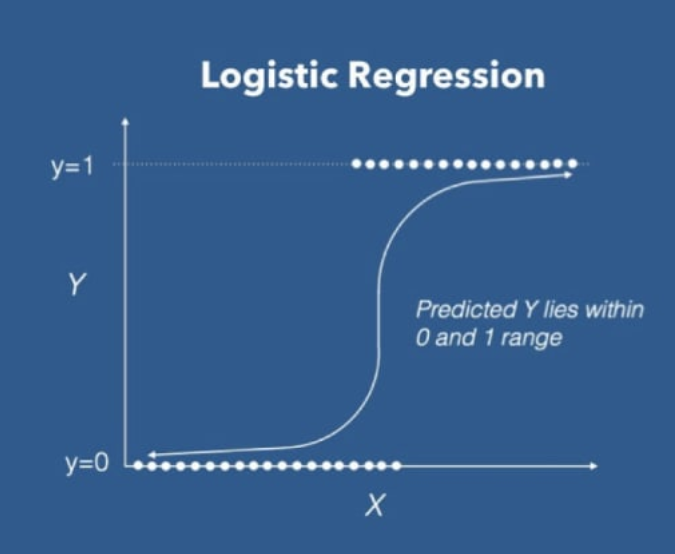

we can’t use Linear Regression instead of Logistic Regression as  linear regression is that it only works with continuous data. A logistic regression yields a logistic curve with values confined to 0 and 1. The curve in logistic regression is generated using the natural logarithm of the target variable’s “odds,” rather than the probability, as in linear regression.

Logit function to Sigmoid Function – Logistic Regression:
Logistic Regression can be expressed as,

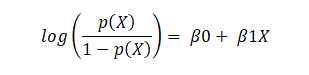

where p(x)/(1-p(x)) is termed odds, and the left-hand side is called the logit or log-odds function. The odds are the ratio of the chances of success to the chances of failure. As a result, in Logistic Regression, a linear combination of inputs is translated to log(odds), with an output of 1.

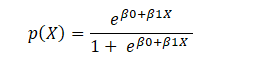

This is the Sigmoid function, which produces an S-shaped curve. It always returns a probability value between 0 and 1. The Sigmoid function is used to convert expected values to probabilities. The function converts any real number into a number between 0 and 1. We utilize sigmoid to translate predictions to probabilities in machine learning.

For measuring the performance of the model solving classification problems, the Confusion matrix is being used, below is the implementation of the Confusion  Matrix.
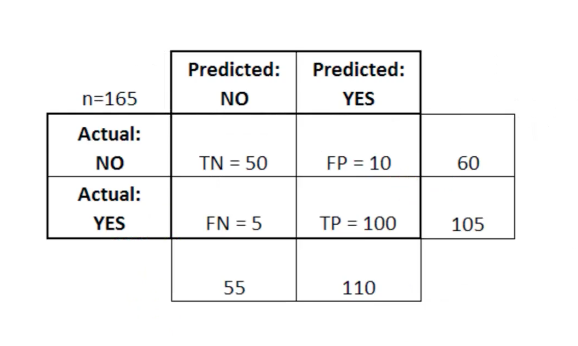

Key terms:

1. – TN Stands for True Negatives(The predicted(negative) value matches the actual(negative) value)
2. – FP stands for False Positives (The actual value, was negative, but the model predicted a positive value)
3. – FN stands for False Negatives(The actual value, was positive, but the model predicted a negative value)
4. – TP stands for True Positives(The predicted(positive) value matched the actual value(positive))
 
For a good model, one should not have a high number of False Positive or  False Negative.

There Are Three Types:

a Binomial

b Ordinal

c Multinomial


# Requirements for Logistic Regression Model to work well.

1. The dependant variable in binary logistic regression must be binary.

2. Only the variables that are relevant should be included.

3. The independent variables must be unrelated to one another. That is, there should be minimal or no multicollinearity in the model.

4. The log chances are proportional to the independent variables.

5. Large sample sizes are required for logistic regression.

# Advantages of Logistic Regression

1. Overfitting is less likely with logistic regression, although it can happen in high-dimensional datasets. 

2. logistic regression may be used to determine the connection between the characteristics.

3. It is less prone to over-fitting in a low-dimensional dataset with enough training instances.

4. It has a strong resemblance to neural networks. A neural network representation may be thought of as a collection of small logistic regression classifiers stacked together.
5. The training time of the logistic regression method is considerably smaller
6.  It’s only good for predicting discrete functions.As a result, the Logistic Regression dependent variable is restricted to the discrete number set.

# Application of Logistic Regression

1. Fraud detection in Credit card
2. Email spam or ham
3. Sentiment Analysis in Twitter analysis
4. Image segmentation, recognition, and classification – X-rays, Scans
5. Object detection through video
6. Handwriting recognition
7. Disease prediction – Diabetes, Cancer, Parkinson etc…

# In Python we can build model through statsmodels or by scikit learn 

### First we will bulid our model with scikit-learn and than by statsmodels

### Steps under Python for Logistic Regression

1. Importing Libraries
2. Importing  the Data set
3. Performing Exploratory data analysis:
    1. Checking various null entries in the dataset, with the help of heatmap
    2.Visualization of various relationships between variables
    3. Using Box Plot to Get details about the distribution 
4. Using function to replace null entries
5. Filling the missing data.
6. Drop null data
7. Create dummy variables
8. Add dummy variables to the DataFrame and drop non-numeric data
9. Print the finalized data set
10. Split the data set into x and y data
11. Split the data set into training data and test data
12. Create the model
13. Train the model and create predictions
14. Calculate performance metrics 'classification_report'
15. Generate a confusion matrix and heatmap
16. Plot the roc_curve

In [1]:
# importing all libraries we will use in Logistic regression
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# for splitting data
from sklearn.model_selection import train_test_split
# for model building
from sklearn.linear_model import LogisticRegression
# Text summary of the precision, recall, F1 score for each class and probability of accuracy of model.
from sklearn import metrics
from sklearn.metrics import classification_report
# checking model accuracy and  binary classification, the count of true negatives,false negatives, true positives and false positives.
from sklearn.metrics import (confusion_matrix,accuracy_score)
#Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
# label encoding just dummies creating
from sklearn.preprocessing import LabelEncoder

In [2]:
# Importing data and checking the header and data of dataset
bank_data= pd.read_csv('bank-full.csv')
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


 Attribute information For bank dataset
 
 Input variables:
 
   bank client data:
   
       1. age (numeric)
       2. job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
       3. marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
       4. education (categorical: "unknown","secondary","primary","tertiary")
       5. default: has credit in default? (binary: "yes","no")
       6. balance: average yearly balance, in euros (numeric) 
       7. housing: has housing loan? (binary: "yes","no")
       8. loan: has personal loan? (binary: "yes","no")
   
   related with the last contact of the current campaign:
   
       9. contact: contact communication type (categorical: "unknown","telephone","cellular") 
      10. day: last contact day of the month (numeric)
      11. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
      12. duration: last contact duration, in seconds (numeric)
  
   other attributes:
   
       13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
       14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means   client was not previously contacted)
       15. previous: number of contacts performed before this campaign and for this client (numeric)
       16. poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
  
    17. y - has the client subscribed a term deposit? (binary: "yes","no")

8. Missing Attribute Values: None

## Problem
Output variable -> y

y -> Whether the client has subscribed a term deposit or not 

Binomial ("yes" or "no")

In [3]:
bank_data['desired_target']=bank_data.y
bank_data.drop(['y'],inplace=True,axis=1)
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,desired_target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
# Checking null values in dataset
bank_data.isnull().sum()
#output shows we dont have any null values in dataset

age               0
job               0
marital           0
education         0
default           0
balance           0
housing           0
loan              0
contact           0
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
desired_target    0
dtype: int64

<AxesSubplot:>

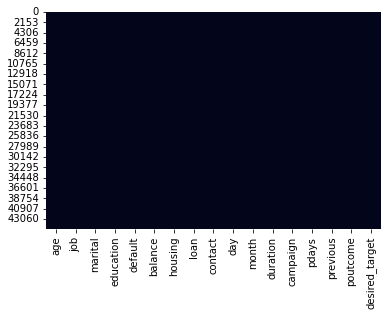

In [5]:
#A far more useful method for assessing missing data in the data set is by quick visualization
sns.heatmap(bank_data.isnull(), cbar=False)
#output shows no white spaces that means no null values in the data set

Converting columns to dummies

In [6]:
bank_data.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,desired_target
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [7]:
bank_data.shape

(45211, 17)

In [8]:
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'desired_target'],
      dtype='object')

Plot all Categorical variables in the data set

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'management'),
  Text(1, 0, 'technician'),
  Text(2, 0, 'entrepreneur'),
  Text(3, 0, 'blue-collar'),
  Text(4, 0, 'unknown'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'admin.'),
  Text(7, 0, 'services'),
  Text(8, 0, 'self-employed'),
  Text(9, 0, 'unemployed'),
  Text(10, 0, 'housemaid'),
  Text(11, 0, 'student')])

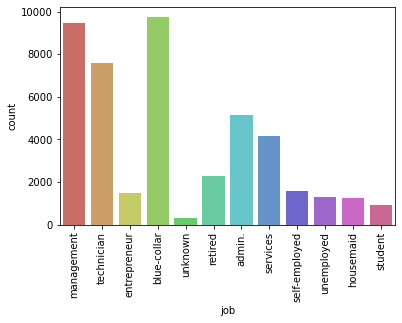

In [9]:
sns.countplot(x='job',data=bank_data,palette='hls')
plt.xticks(rotation=90)

(array([0, 1, 2]),
 [Text(0, 0, 'married'), Text(1, 0, 'single'), Text(2, 0, 'divorced')])

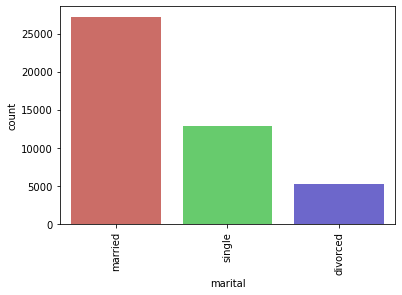

In [10]:
sns.countplot(x='marital',data=bank_data,palette='hls')
plt.xticks(rotation=90)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'tertiary'),
  Text(1, 0, 'secondary'),
  Text(2, 0, 'unknown'),
  Text(3, 0, 'primary')])

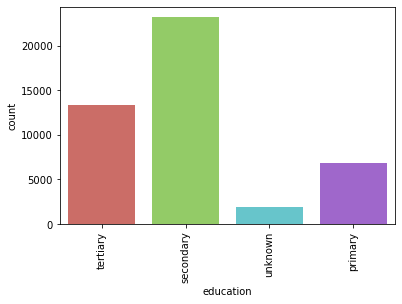

In [11]:
sns.countplot(x='education',data=bank_data,palette='hls')
plt.xticks(rotation=90)

(array([0, 1]), [Text(0, 0, 'yes'), Text(1, 0, 'no')])

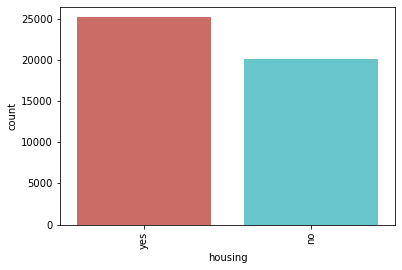

In [12]:
sns.countplot(x='housing',data=bank_data,palette='hls')
plt.xticks(rotation=90)

<AxesSubplot:>

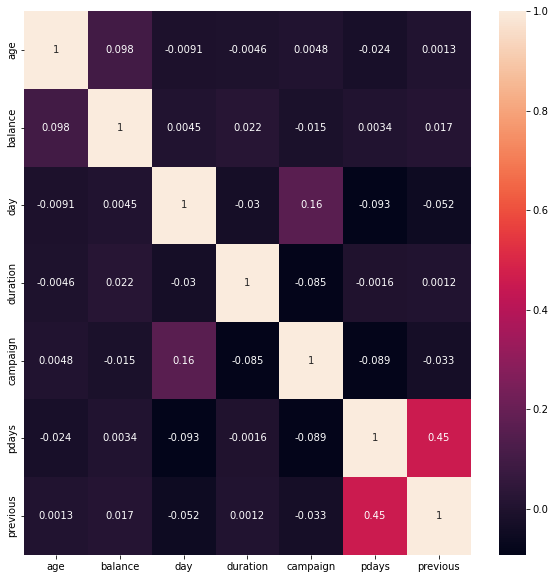

In [13]:
fig=plt.figure(figsize=(10,10))
sns.heatmap(bank_data.corr(), annot=True)

In [14]:
bank_data.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


<AxesSubplot:xlabel='job'>

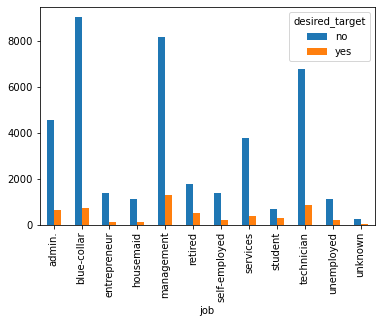

In [15]:
pd.crosstab(bank_data.job,bank_data.desired_target).plot(kind='bar')

<AxesSubplot:xlabel='marital'>

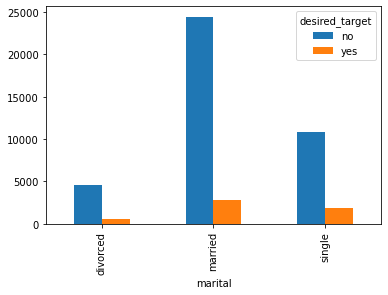

In [16]:
pd.crosstab(bank_data.marital,bank_data.desired_target).plot(kind='bar')

<AxesSubplot:xlabel='education'>

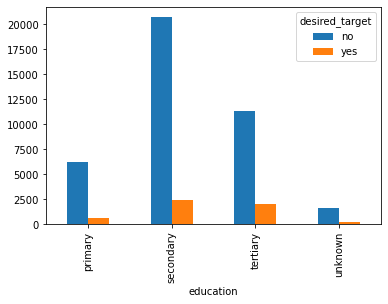

In [17]:
pd.crosstab(bank_data.education,bank_data.desired_target).plot(kind='bar')

<AxesSubplot:xlabel='default'>

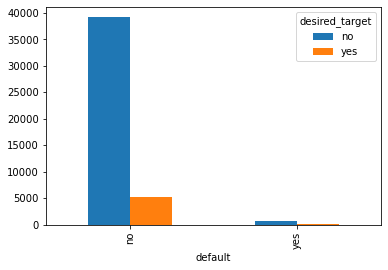

In [18]:
pd.crosstab(bank_data.default,bank_data.desired_target).plot(kind='bar')

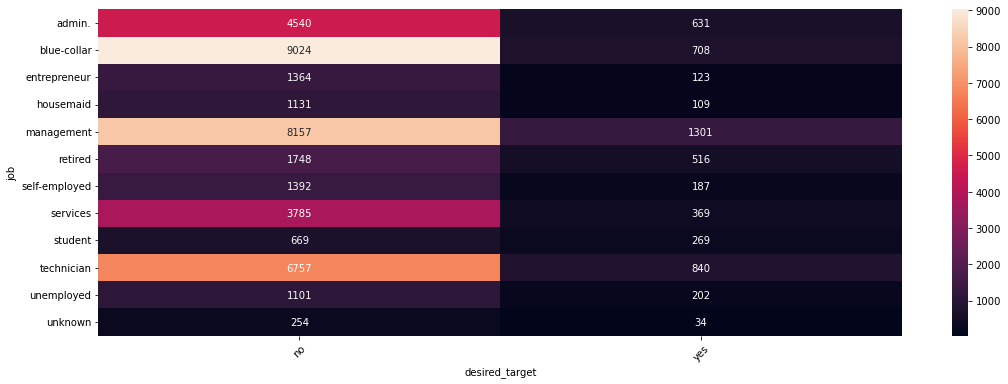

In [19]:
fig= plt.figure(figsize=(18, 6))
sns.heatmap(pd.crosstab(index=bank_data['job'], columns=bank_data['desired_target']), annot=True, 
            fmt='g')
plt.xticks(rotation=45);

### Find columns contain 'unknown'

In [20]:
cols = [col for col in bank_data.columns]
col_missing = []
for col in cols:
    if 'unknown' in bank_data[col].values:
        col_missing.append(col)
        
print("Columns with Unknown Values -",col_missing)  

Columns with Unknown Values - ['job', 'education', 'contact', 'poutcome']


C:\Users\rahul\AppData\Local\Temp/ipykernel_58352/2692726986.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'unknown' in bank_data[col].values:


In [21]:
for col in col_missing:
    print(col,"-",bank_data[bank_data[col].str.contains('unknown')][col].count())

job - 288
education - 1857
contact - 13020
poutcome - 36959


#### Or, By below method

In [22]:
bank_data.education.str.contains('unknown',case=False).value_counts()

False    43354
True      1857
Name: education, dtype: int64

In [23]:
bank_data.job.str.contains('unknown',case=False).value_counts()

False    44923
True       288
Name: job, dtype: int64

In [24]:
bank_data.contact.str.contains('unknown',case=False).value_counts()

False    32191
True     13020
Name: contact, dtype: int64

In [25]:
bank_data.poutcome.str.contains('unknown',case=False).value_counts()

True     36959
False     8252
Name: poutcome, dtype: int64

In [26]:
#Or, By below function run on each column

print(bank_data.groupby(bank_data['education'])['education'].count(),"\n")

education
primary       6851
secondary    23202
tertiary     13301
unknown       1857
Name: education, dtype: int64 



In [27]:
print(bank_data.groupby(bank_data['poutcome'])['poutcome'].count(),"\n")

poutcome
failure     4901
other       1840
success     1511
unknown    36959
Name: poutcome, dtype: int64 



### Below dummies types are not use in model but for practice taken, these are useful when categorical column contain lots of category

In [28]:
# By pandas.get_dummies function
pd.get_dummies(bank_data.job)

,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0,0,0,0,0,0,0,0,0,1,0,0
45207,0,0,0,0,0,1,0,0,0,0,0,0
45208,0,0,0,0,0,1,0,0,0,0,0,0
45209,0,1,0,0,0,0,0,0,0,0,0,0


In [29]:
#by sklearn LabelEncoder function 
bank_data1=bank_data.copy()
lb_make_object= LabelEncoder()
bank_data1['job_dummies']=lb_make_object.fit_transform(bank_data1.job)
bank_data1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,desired_target,job_dummies
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,4
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,9
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,2
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,11


### Replace method in Python

In [30]:
bank_data['education'] = bank_data.education.replace('unknown',bank_data.education.mode()[0])

##### Drop columns not use in model.

'education', 'job', 'contact', 'day', 'month', 'poutcome' (unknow very high) as these fields have no significance to the problem, they are no use to us. We have only the fields which we feel are important for our data analysis and prediction. 

In [31]:
bank_data=bank_data.drop(bank_data.iloc[:,[1,3,8,9,10,15]],axis=1)
bank_data

,age,marital,default,balance,housing,loan,duration,campaign,pdays,previous,desired_target
0,58,married,no,2143,yes,no,261,1,-1,0,no
1,44,single,no,29,yes,no,151,1,-1,0,no
2,33,married,no,2,yes,yes,76,1,-1,0,no
3,47,married,no,1506,yes,no,92,1,-1,0,no
4,33,single,no,1,no,no,198,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,married,no,825,no,no,977,3,-1,0,yes
45207,71,divorced,no,1729,no,no,456,2,-1,0,yes
45208,72,married,no,5715,no,no,1127,5,184,3,yes
45209,57,married,no,668,no,no,508,4,-1,0,no


Now, we will deal with creating dummies by .map() function

In [32]:
marital_choice={'single':1,'married':2, 'divorced':3}
bank_data['marital']=bank_data['marital'].map(marital_choice)
bank_data.groupby(bank_data['marital'])['marital'].count()

marital
1    12790
2    27214
3     5207
Name: marital, dtype: int64

In [33]:
default_choice={'yes':1,'no':0}
bank_data['default']=bank_data['default'].map(default_choice)
bank_data.groupby(bank_data['default'])['default'].count()

default
0    44396
1      815
Name: default, dtype: int64

In [34]:
housing_choice={'yes':1,'no':0}
bank_data['housing']=bank_data['housing'].map(housing_choice)
bank_data.groupby(bank_data['housing'])['housing'].count()

housing
0    20081
1    25130
Name: housing, dtype: int64

In [35]:
loan_choice={'yes':1,'no':0}
bank_data['loan']=bank_data['loan'].map(loan_choice)
bank_data.groupby(bank_data['loan'])['loan'].count()

loan
0    37967
1     7244
Name: loan, dtype: int64

In [36]:
desired_target_choice={'yes':1,'no':0}
bank_data['desired_target']=bank_data['desired_target'].map(desired_target_choice)
bank_data.groupby(bank_data['desired_target'])['desired_target'].count()

desired_target
0    39922
1     5289
Name: desired_target, dtype: int64

In [37]:
bank_data

,age,marital,default,balance,housing,loan,duration,campaign,pdays,previous,desired_target
0,58,2,0,2143,1,0,261,1,-1,0,0
1,44,1,0,29,1,0,151,1,-1,0,0
2,33,2,0,2,1,1,76,1,-1,0,0
3,47,2,0,1506,1,0,92,1,-1,0,0
4,33,1,0,1,0,0,198,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,2,0,825,0,0,977,3,-1,0,1
45207,71,3,0,1729,0,0,456,2,-1,0,1
45208,72,2,0,5715,0,0,1127,5,184,3,1
45209,57,2,0,668,0,0,508,4,-1,0,0


In [38]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             45211 non-null  int64
 1   marital         45211 non-null  int64
 2   default         45211 non-null  int64
 3   balance         45211 non-null  int64
 4   housing         45211 non-null  int64
 5   loan            45211 non-null  int64
 6   duration        45211 non-null  int64
 7   campaign        45211 non-null  int64
 8   pdays           45211 non-null  int64
 9   previous        45211 non-null  int64
 10  desired_target  45211 non-null  int64
dtypes: int64(11)
memory usage: 3.8 MB


In [39]:
bank_data.isnull().sum()

age               0
marital           0
default           0
balance           0
housing           0
loan              0
duration          0
campaign          0
pdays             0
previous          0
desired_target    0
dtype: int64

Now, after checking null values Dtype of every column we will now split data into test data and train data and normalize the data set

In [40]:
# We will declare target variable and independent variables
x = bank_data.drop(['desired_target'],axis=1)        # independent variables
y = bank_data.desired_target            # target variable

In [41]:
# Normalize dataset
x= (x-np.min(x))/(np.max(x)-np.min(x))
x

,age,marital,default,balance,housing,loan,duration,campaign,pdays,previous
0,0.519481,0.5,0.0,0.092259,1.0,0.0,0.053070,0.000000,0.000000,0.000000
1,0.337662,0.0,0.0,0.073067,1.0,0.0,0.030704,0.000000,0.000000,0.000000
2,0.194805,0.5,0.0,0.072822,1.0,1.0,0.015453,0.000000,0.000000,0.000000
3,0.376623,0.5,0.0,0.086476,1.0,0.0,0.018707,0.000000,0.000000,0.000000
4,0.194805,0.0,0.0,0.072812,0.0,0.0,0.040260,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
45206,0.428571,0.5,0.0,0.080293,0.0,0.0,0.198658,0.032258,0.000000,0.000000
45207,0.688312,1.0,0.0,0.088501,0.0,0.0,0.092721,0.016129,0.000000,0.000000
45208,0.701299,0.5,0.0,0.124689,0.0,0.0,0.229158,0.064516,0.212156,0.010909
45209,0.506494,0.5,0.0,0.078868,0.0,0.0,0.103294,0.048387,0.000000,0.000000


In [42]:
# split dataset
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=0)

In [43]:
#Model Building
# object creation and model fitting
logreg= LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression()

In [44]:
#coefficients
logreg.coef_

array([[ 0.23211783, -0.47003647, -0.4169245 ,  2.14663781, -1.17522742,
        -0.7000404 , 17.42923316, -5.51654106,  2.98599231,  2.83184058]])

In [45]:
#Probability values
logreg.predict_proba(x_train)

array([[0.86920094, 0.13079906],
       [0.89464933, 0.10535067],
       [0.95930282, 0.04069718],
       ...,
       [0.86615292, 0.13384708],
       [0.81996708, 0.18003292],
       [0.96064553, 0.03935447]])

In [46]:
# Prediction for the test dataset
ypred= logreg.predict(x_test)
ypred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [47]:
# checking model accuracy
conf_matrix=confusion_matrix(y_test, ypred)
conf_matrix

array([[11767,   202],
       [ 1313,   282]], dtype=int64)

In [48]:
test_accuracy= accuracy_score(y_test,ypred)
test_accuracy

0.8883072839870245

In [49]:
pd.crosstab(ypred,y_test)

desired_target,0,1
row_0,,
0,11767,1313
1,202,282


In [50]:
# classification report
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11969
           1       0.58      0.18      0.27      1595

    accuracy                           0.89     13564
   macro avg       0.74      0.58      0.61     13564
weighted avg       0.86      0.89      0.86     13564



In [51]:
logit_roc_score= roc_auc_score(y_test,ypred)
logit_roc_score

0.5799627878812323

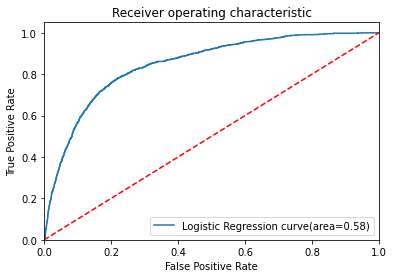

In [52]:
fpr,tpr,threshold= roc_curve(y_test,logreg.predict_proba(x_test)[:,1])
plt.plot(fpr,tpr,label='Logistic Regression curve(area=%0.2f)'% logit_roc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()   

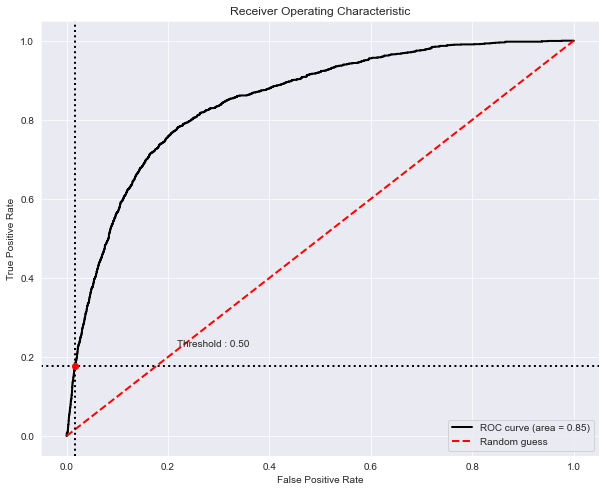

In [53]:
# Binary classification is a form of classification — 
            #the process of predicting categorical variables — where the output is restricted to two classes.
from plot_metric.functions import BinaryClassification

bc = BinaryClassification(y_test, logreg.predict_proba(x_test)[:,1],  labels=[0, 1])
plt.figure(figsize=(10, 8))
bc.plot_roc_curve()
plt.show()

# Logistic Regression by statsmodels 

In [54]:
import statsmodels.api as sm
#Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [55]:
# We will declare target variable and independent variables
x_f = bank_data.drop(['desired_target'],axis=1)        # independent variables
y_f = bank_data.desired_target            # target variable

In [56]:
lr= sm.Logit(y_f,x_f).fit()

Optimization terminated successfully.
         Current function value: 0.286941
         Iterations 8


In [57]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         desired_target   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45201
Method:                           MLE   Df Model:                            9
Date:                Sun, 30 Jan 2022   Pseudo R-squ.:                  0.2049
Time:                        00:46:48   Log-Likelihood:                -12973.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0290      0.001    -21.468      0.000      -0.032      -0.026
marital       -0.4918      0.029    -16.763      0.000      -0.549      -0.434
default       -0.5301      0.157     -3.382      0.001      -0.837      -0.223
balance     1.582e-05    4.6e-06      3.435      0.001    6.79e-06    2.48e-05
housing       -1.4817      0.034    -43.014      0.000      -1.549      -1.414
loan          -0.8160      0.056    -14.651      0.000      -0.925      -0.707
duration       0.0036   5.79e-05     61.703      0.000       0.003       0.004
campaign      -0.2259      0.011    -21.418      0.000      -0.247      -0.205
pdays          0.0025      0.000     15.040      0.000       0.002       0.003
previous       0.0797      0.008      9.989      0.000       0.064       0.095
==============================================================================
"""

In [58]:
lr.params

age        -0.029033
marital    -0.491833
default    -0.530086
balance     0.000016
housing    -1.481726
loan       -0.815977
duration    0.003573
campaign   -0.225857
pdays       0.002466
previous    0.079728
dtype: float64

In [59]:
lr.pvalues

age         3.097396e-102
marital      4.566469e-63
default      7.186908e-04
balance      5.919595e-04
housing      0.000000e+00
loan         1.324108e-48
duration     0.000000e+00
campaign    8.999411e-102
pdays        4.031265e-51
previous     1.698648e-23
dtype: float64

In [60]:
pred= lr.predict(x_f)
pred

0        0.031950
1        0.050244
2        0.014830
3        0.023993
4        0.274738
           ...   
45206    0.588988
45207    0.088326
45208    0.647303
45209    0.152047
45210    0.541918
Length: 45211, dtype: float64

In [61]:
auc= roc_auc_score(y_f,pred)
auc

0.8296938838827981

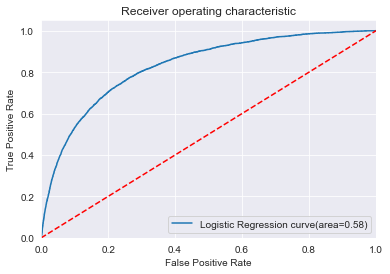

In [62]:
fpr,tpr,threshold= roc_curve(y_f,pred)
plt.plot(fpr,tpr,label='Logistic Regression curve(area=%0.2f)'% logit_roc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()   